# Study on Increasing Revenue for an Online Store

Employees of the online store have prepared a list of hypotheses to increase revenue. The purpose of this study is to prioritize the hypotheses and analyze the results of an A/B test to evaluate the effectiveness of changes on the web platform/business processes.

The analysis will focus on key metrics such as average order value, number of orders, and revenue to determine the impact of the implemented changes on user behavior. A comparative analysis of two groups - the control group (Group A) and the test group (Group B) - will be conducted. The study will examine how the planned changes may affect the key metrics, leading to a conclusion about the feasibility of further A/B testing and the permanent implementation of the planned changes.

**Research Objective:**  analyze the results of an A/B test to evaluate the effectiveness of changes on the web platform/business processes.

**Research Tasks:**

- Assess the suitability of the initial data for further analysis and conduct data preprocessing.
- Apply ICE and RICE frameworks to prioritize hypotheses and compare the results.- 
Determine cumulative revenue, number of orders, and average order value for the A/B test groups based on available dat.;- 
Identify anomalies in the data and establish anomaly boundari.s- ;
Calculate the statistical significance of differences in average number of orders per visitor and average order value using the initial and anomaly-free d.t- a;
Decide on the success of the A/B test and whether to conclude or continue it.

## Summary of the Analysis Results

After removing outliers in the original data frames and based on the results of the Mann-Whitney test, the following conclusion can be drawn:

- There is a statistically significant difference in the average number of orders between groups A and B, but no difference in the average order value.

Users in group B placed almost 20% more orders compared to users in group A; however, by the end of the test, their average order value fell below that of group A.

If testing continues:

- If the average order value remains the same or increases, group B will emerge as the winner.
- If the average order value in group B decreases relative to group A, the results may equalize or group A may take the lead.

## Data Overview 

Importing the necessary libraries for data analysis:

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import json

Прочитаем файлы `hypothesis.csv`, `orders.csv`, `visitors.csv` с данными (путь к данным храниться в файле формата json) и сохраним их в соответствующих переменных:

Reading the files `hypothesis.csv`, `orders.csv`, and `visitors.csv` with the data (the path to the data is stored in a JSON file) and saving them in the variables `hypothesis`, `orders`, `visitors`:

In [2]:
# Reading of JSON file
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)
 
# Reading the CSV file using the path from the JSON file
dataset_path_hypothesis = config['dataset_path_AB_hypothesis']
dataset_path_orders = config['dataset_path_AB_orders']
dataset_path_visitors = config['dataset_path_AB_visitors']
hypothesis = pd.read_csv(dataset_path_hypothesis)
orders = pd.read_csv(dataset_path_orders)
visitors = pd.read_csv(dataset_path_visitors)

Removing the restrictions on displaying the number of columns, rows, and column width.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Let's display the first few rows of the datasets and the overall information about the dataframes.

In [4]:
# Function to display the first 5 rows and information of a dataframe
def display_data(df, df_name):
    print(f"Первые 5 строк датафрейма {df_name}:\n")
    print(df.head(5))
    print("\nИнформация о датафрейме:\n")
    print(df.info())
    print("\n" + "="*80 + "\n")

# Main function to display data
def main():
    display_data(hypothesis, 'hypothesis')
    display_data(orders, 'orders')
    display_data(visitors, 'visitors')

# Running the main function
main()

Первые 5 строк датафрейма hypothesis:

                                                                                                     Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   

   Reach  Impact  Confidence  Efforts  
0      3      10           8        6  
1      2       5           4       10  
2      8       3           7        3  
3      8       3           3        8  
4      3       1           1        1  

Информация о датафрейме:

<cl

From the initial rows of each data frame, it can be concluded that they contain relevant data. There are no missing values in any of the data frames.

## Data Processing

To proceed, we'll convert the column names in the data frames to lowercase and add underscores between words in the column names:

In [5]:
# Converting column names to lowercase 
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()

# Adding of underscores
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

The columns in the `orders` and `visitors` data frames containing dates are in `object` format and will be converted to `datetime` format in a subsequent part of the study.

Let's check for any obvious duplicates in the data frames:

In [6]:
hypothesis.duplicated().sum()

0

In [7]:
orders.duplicated().sum()

0

In [8]:
visitors.duplicated().sum()

0

No obvious missing values or duplicates were found in the initial data. The column names of the data frames have been adjusted. Differences in data types and their actual content were noted in the `date` columns of the `orders` and `visitors` data frames. Moving on to the next stage of the analysis.

## Data Analysis

### Hypothesis Prioritization

In the file /datasets/hypothesis.csv, there are 9 hypotheses for increasing the revenue of an online store with specified parameters: Reach, Impact, Confidence, Effort.

Firstly, let's list all hypothesis names and translate them into English:

In [9]:
hypothesis['hypothesis']

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

In [10]:
translations = {
    'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей':
    'Add two new traffic acquisition channels, which will attract 30% more users',
    'Запустить собственную службу доставки, что сократит срок доставки заказов': 
    'Launch our own delivery service, which will reduce order delivery time',
    'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа': 
    'Add product recommendation blocks to the online store website to increase conversion and average order value',
    'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар': 
    'Change the category structure to increase conversion, as users will find the desired product faster',
    'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей': 
    'Change the background color of the homepage to increase user engagement',
    'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов': 
    'Add a customer review page for the store to increase the number of orders',
    'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию': 
    'Display banners with current promotions and sales on the homepage to increase conversion',
    'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок': 
    'Add a subscription form to all main pages to build a customer base for email newsletters', 
    'Запустить акцию, дающую скидку на товар в день рождения': 
    'Launch a promotion offering a discount on the product on the customer\'s birthday'
}

hypothesis['hypothesis'] = hypothesis['hypothesis'].map(translations)

Let's apply the ICE framework to prioritize hypotheses and sort them in descending order of priority:

In [11]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(2)
hypothesis.sort_values(by = 'ICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,Launch a promotion offering a discount on the product on the customer's birthday,1,9,9,5,16.20
0,"Add two new traffic acquisition channels, which will attract 30% more users",3,10,8,6,13.33
7,Add a subscription form to all main pages to build a customer base for email newsletters,10,7,8,5,11.20
6,Display banners with current promotions and sales on the homepage to increase conversion,5,3,8,3,8.00
2,Add product recommendation blocks to the online store website to increase conversion and average order value,8,3,7,3,7.00
1,"Launch our own delivery service, which will reduce order delivery time",2,5,4,10,2.00
5,Add a customer review page for the store to increase the number of orders,3,2,2,3,1.33
3,"Change the category structure to increase conversion, as users will find the desired product faster",8,3,3,8,1.12
4,Change the background color of the homepage to increase user engagement,3,1,1,1,1.00


Now let's apply the RICE framework to prioritize hypotheses and sort them in descending order of priority:

In [12]:
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / 
                      hypothesis['efforts'])
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Add a subscription form to all main pages to build a customer base for email newsletters,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the online store website to increase conversion and average order value,8,3,7,3,7.00,56.0
0,"Add two new traffic acquisition channels, which will attract 30% more users",3,10,8,6,13.33,40.0
6,Display banners with current promotions and sales on the homepage to increase conversion,5,3,8,3,8.00,40.0
8,Launch a promotion offering a discount on the product on the customer's birthday,1,9,9,5,16.20,16.2
3,"Change the category structure to increase conversion, as users will find the desired product faster",8,3,3,8,1.12,9.0
1,"Launch our own delivery service, which will reduce order delivery time",2,5,4,10,2.00,4.0
5,Add a customer review page for the store to increase the number of orders,3,2,2,3,1.33,4.0
4,Change the background color of the homepage to increase user engagement,3,1,1,1,1.00,3.0


When applying the ICE framework, the most promising hypotheses are reflected as 8 'Launch a promotion offering a discount on the product on the customer's birthday', 0 'Add two new traffic acquisition channels, which will attract 30% more users', and 7 'Add a subscription form to all main pages to build a customer base for email newsletters'. However, since hypothesis 8 has the minimum audience reach, according to the RICE framework, it drops out of the top three, while hypothesis 2 with a high Reach score is added. When applying both prioritization methods, hypotheses 7 and 0 are the most promising.

### A/B Test Analysis

Results of the A/B test are contained in the files /datasets/orders.csv and /datasets/visitors.csv. Let's conduct a detailed analysis of these datasets.

#### Cumulative Revenue Plot by Groups

In [13]:
# Converting the data type of the `date` column to datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

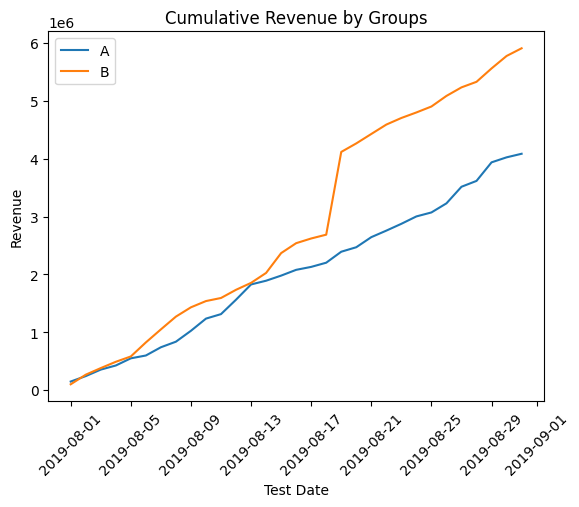

In [14]:
# Creating an array of unique date-group pairs from orders data
datesGroups = orders[['date','group']].drop_duplicates()

# Aggregating cumulative data by day for orders
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Aggregating cumulative data by day for visitors
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# Combining cumulative data into one table with clear column names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# DataFrame with cumulative orders and revenue by day in group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and revenue by day in group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting cumulative revenue for group A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting cumulative revenue for group B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding plot title
plt.title('Cumulative Revenue by Groups')

# Adding axis labels
plt.xlabel('Test Date')
plt.ylabel('Revenue')

plt.legend();

Throughout the entire duration of the A/B test, cumulative revenue for group B has been higher than that of group A. However, the revenue graph for group B sharply spikes around August 18-19, 2019. This may indicate the presence of outliers - either a sudden surge in the number of orders or the appearance of very high-value orders in the dataset—that could significantly distort the results.

#### Graph of Cumulative Average Order Value by Groups

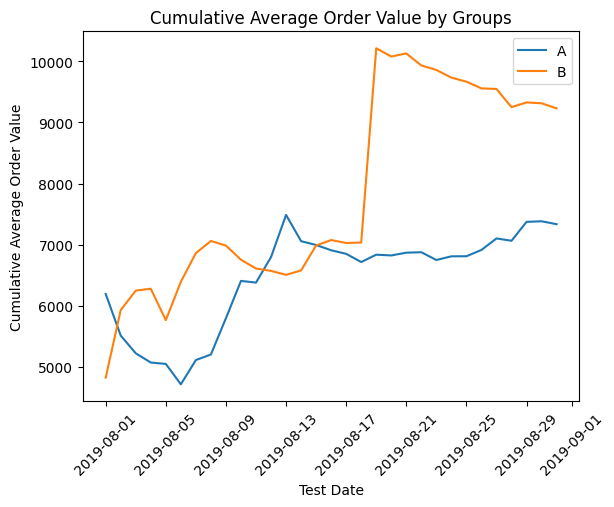

In [15]:
# Dividing cumulative revenue by cumulative number of orders to get cumulative average order value
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding plot title
plt.title('Cumulative Average Order Value by Groups')

# Adding axis labels
plt.xlabel('Test Date')
plt.ylabel('Cumulative Average Order Value')

plt.legend();

The average order value of Group B is consistently higher throughout the test compared to Group A. However, there is a massive spike in the average order value observed on August 18-19, 2019 (similar to cumulative revenue). Following this spike, Group A's average order value becomes relatively stable from around August 14, 2019 onwards, whereas Group B shows a steady decline in value after the spike, continuing until the end of the experiment.

#### Graph of relative change in cumulative average check of Group B compared to Group A

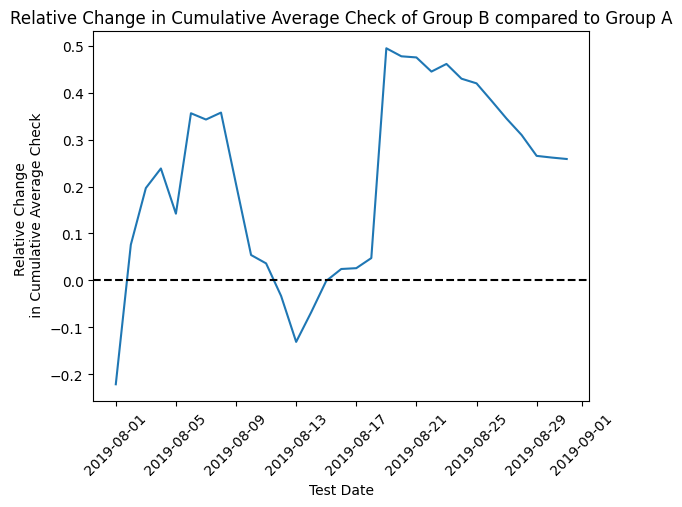

In [16]:
# Combining data into one dataframe
mergedCumulativeRevenue = cumulativeRevenueA.merge(
                            cumulativeRevenueB, 
                            left_on='date', 
                            right_on='date', 
                            how='left', 
                            suffixes=['A', 'B'])

# Plotting the ratio of average checks
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) /
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']) - 1)

# Adding the X-axis
plt.axhline(y=0, color='black', linestyle='--')

# Rotating the X-axis labels
plt.xticks(rotation=45)

# Adding labels to the axes
plt.xlabel('Test Date')
plt.ylabel('Relative Change \n in Cumulative Average Check')

# Adding a title to the plot
plt.title('Relative Change in Cumulative Average Check of Group B compared to Group A');

The graph shows sharp fluctuations in Group B values relative to Group A. Initially, Group B's results were improving compared to Group A, but this changed around August 9, 2019. The sudden spike around August 18-19, 2019, similar to previous graphs, suggests the presence of outliers.

#### Graph of Cumulative Average Orders per Visitor by Groups

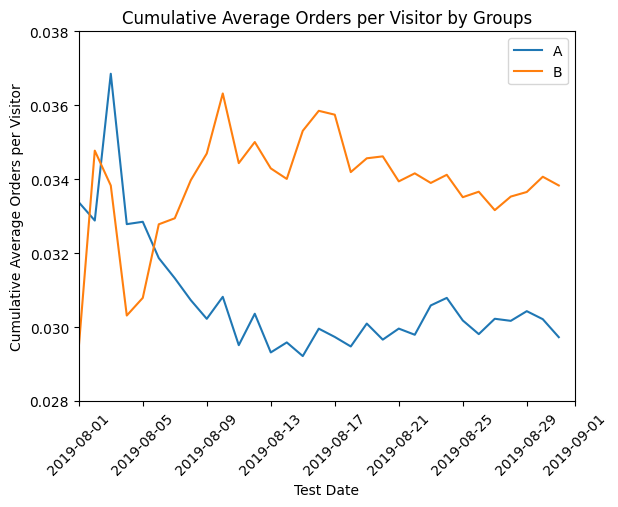

In [17]:
# Calculating the cumulative average orders per visitor
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# Separating data for group A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# Separating data for group B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# Plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# Setting the axis scale
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.028, 0.038])

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding labels to axes
plt.xlabel('Test Date')
plt.ylabel('Cumulative Average Orders per Visitor')

# Adding title to the plot
plt.title('Cumulative Average Orders per Visitor by Groups');

In the beginning of the test, segment A initially had a higher cumulative average number of orders for a brief period, but gradually segment B caught up and stabilized around a single value, higher than segment A's value.

#### Graph of the Relative Change in Cumulative Average Orders per Visitor for Group B Compared to Group A

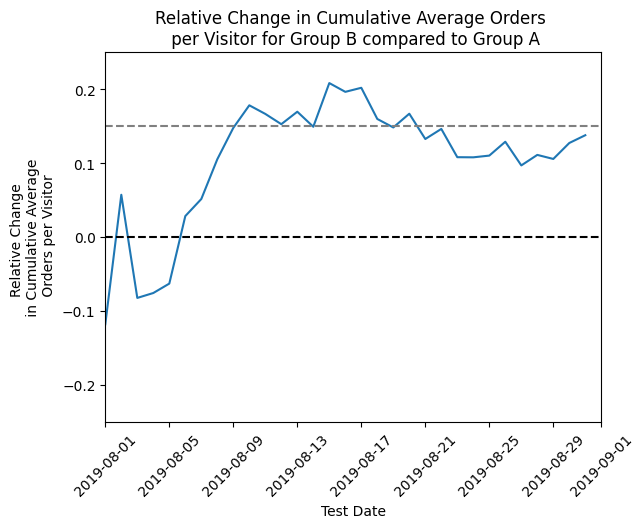

In [18]:
# Merging tables cumulativeDataA and cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
                              cumulativeDataB[['date','conversion']], 
                              left_on='date', 
                              right_on='date', 
                              how='left', 
                              suffixes=['A', 'B'])

# Plotting the graph
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1)

# Adding horizontal lines for reference
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

# Setting the axis scale
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.25, 0.25])

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding labels to axes
plt.xlabel('Test Date')
plt.ylabel('Relative Change \n in Cumulative Average \n Orders per Visitor')

# Adding title to the graph
plt.title('Relative Change in Cumulative Average Orders \n per Visitor for Group B compared to Group A');

At the beginning of the test, Group B was trailing behind Group A; however, it later surged ahead. Starting from August 9, 2019, the average number of orders per visitor for Group B leveled off and was approximately 15% higher than that of Group A.

#### Scatter Plot of Orders per User

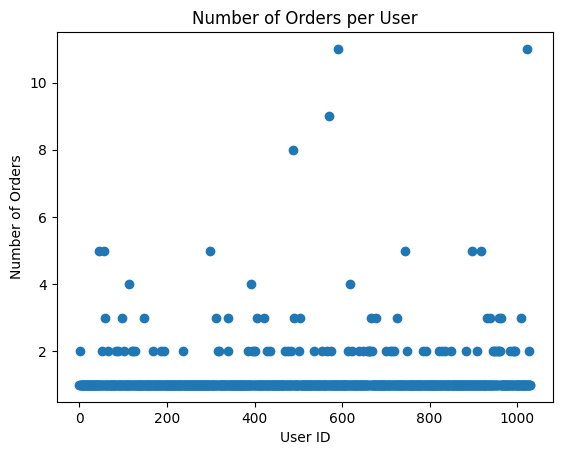

In [19]:
# Calculating the number of orders for each user
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

# Renaming columns of the resulting dataframe
ordersByUsers.columns = ['visitor_id', 'orders']

# Series of numbers from 0 to the number of observations in ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# Plotting a scatter plot
plt.scatter(x_values, ordersByUsers['orders']) 

# Adding axis labels
plt.xlabel('User ID')
plt.ylabel('Number of Orders')

# Adding plot title
plt.title('Number of Orders per User');

Users who made more than two orders are relatively few. To determine what number of orders constitutes an outlier for this dataset, we will calculate percentiles of the number of orders per user.

#### Calculating Percentiles of Order Count per User

In [20]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Only 1% of visitors make 4 or more orders, and only 5% make 2 or more. We will set a threshold to identify anomalous users based on order count around more than 2 orders (>2).

#### Scatter Plot of Order Values

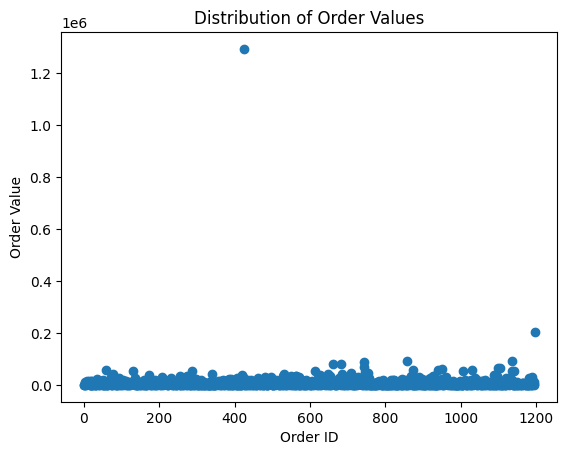

In [21]:
# A series of numbers from 0 to the number of observations in orders['revenue']
x_values = pd.Series(range(0, len(orders['revenue'])))

# Plotting a scatter plot
plt.scatter(x_values, orders['revenue'])

# Adding axis labels
plt.xlabel('Order ID')
plt.ylabel('Order Value')

# Adding title to the plot
plt.title('Distribution of Order Values');

According to the constructed graph, there are only two anomalous order values: one exceeding 200,000 and one exceeding a million. These values are definitely outliers considering that the cost of the remaining orders does not exceed 90,000.

#### Calculation of Order Cost Percentiles

In [22]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

The order cost for 5% of users does not exceed 28,000, and for 1% of users, it is not more than approximately 58,000. Since there are only two significantly anomalous values, we will set the threshold for identifying anomalous users based on order cost at 60,000. This way, we will exclude less than 1% of all users.

#### Calculation of the Statistical Significance of Differences in the Average Number of Orders per Visitor between Groups Based on 'Raw' Data

Let's formulate the hypotheses.

Null hypothesis: There are no differences in the average number of orders per visitor between the groups.

Alternative hypothesis: There are differences in the average number of orders per visitor between the groups.

In [23]:
# Calculating the daily number of visitors for group A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Calculating the cumulative number of visitors for group A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

# Renaming the columns of the dataframe
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Performing the same actions for group B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Calculating the daily number of orders for users in group A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

# Renaming the columns of the dataframe
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Calculating the cumulative number of orders for users in group A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

# Renaming the columns of the dataframe
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# Performing the same actions for group B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Merging the dataframes
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# Determining the number of orders for each user in group A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

# Renaming the columns of the dataframe
ordersByUsersA.columns = ['userId', 'orders']

# Performing the same actions for group B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

# Declaring the variable sampleA, in which the users from group A will correspond to the number of their orders. 
# (Those who did not place any orders will correspond to zeros.) 
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Declaring a similar variable sampleB for users in group B
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Calculating the statistical significance of the difference in the average number of orders based on 
# the results of the A/B test, using the Mann-Whitney test
print("Statistical significance of the difference in the average number of orders based on the results of the A/B test:", 
      "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Calculating and display the relative difference in the average between the groups. 
print("Relative difference in the average between the groups:", 
      "{0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))

Statistical significance of the difference in the average number of orders based on the results of the A/B test: 0.01679
Relative difference in the average between the groups: 0.13808


Based on the results of the Mann-Whitney test, the p-value is approximately 0.017, which is less than 0.05. This means we reject the null hypothesis that there are no differences in the average number of orders per visitor between the groups.

The relative increase in the average for group B compared to group A is 13.8%.

#### Calculation of the Statistical Significance of Differences in the Average Order Value between Groups Based on 'Raw' Data

Let's check the statistical significance of differences in the average order value between segments.

Null hypothesis: There are no differences in the average order value between the groups.

Alternative hypothesis: There are differences in the average order value between the groups.

In [24]:
# Calculating the statistical significance of differences in the average order value between groups
print("Statistical significance of differences in the average order value between groups:", 
      '{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

# Displaying the relative increase in the average order value for group B
print("Relative increase in the average order value for group B:", 
      '{0:.5f}'.format(orders[orders['group']=='B']['revenue'].mean() /
                       orders[orders['group']=='A']['revenue'].mean() - 1))


Statistical significance of differences in the average order value between groups: 0.72929
Relative increase in the average order value for group B: 0.25871


The p-value is approximately 0.73, which is greater than 0.05 — therefore, we do not reject the null hypothesis, indicating that there are no statistically significant differences in the average order value between the groups.

However, the relative difference in the average order value between segments is approximately 26%.

#### Calculation of the Statistical Significance of Differences in the Average Number of Orders per Visitor between Groups Using 'Cleaned' Data

Earlier, we identified as anomalous the data of users who made more than two orders, as well as those whose order value exceeded 60,000.
Let's find out how many user data points can be classified as anomalous.

In [25]:
# Creating a dataframe with information about users who made more than 2 orders
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

# Creating a dataframe with information about users whose order value exceeded 60,000
usersWithExpensiveOrders = orders[orders['revenue'] > 60000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.shape[0])

30


We have a total of 30 anomalous users.

Let's determine how their actions affected the test results. We will calculate the statistical significance of differences in the average number of orders between test groups using cleaned data.

Null hypothesis: There are no differences in the average number of orders per visitor between the groups.

Alternative hypothesis: There are differences in the average number of orders per visitor between the groups.

In [26]:
# Preparing samples of order counts per user for each test group
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            ~ordersByUsersA['userId'].isin(abnormalUsers)
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            ~ordersByUsersB['userId'].isin(abnormalUsers)
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

# Applying the Mann-Whitney U test to the obtained samples
print("Statistical significance of differences in the average number of orders based on A/B test results:", 
      '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Relative difference in the average number of orders between groups:",
      '{0:.5f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

Statistical significance of differences in the average number of orders based on A/B test results: 0.00926
Relative difference in the average number of orders between groups: 0.17625


The statistical significance of differences in the average number of orders based on A/B test results using cleaned data is 0.009, which is significantly less than 0.05. This means we again reject the null hypothesis of no differences in the average number of orders per visitor between the groups, as we did with the 'raw' data.

The relative difference in the average number of orders between groups increased to 17.6% with cleaned data.

It can be concluded that outliers do not fundamentally change the analysis results of the two datasets, and the results of group B in terms of average number of orders are statistically significantly higher than those of group A.

#### Calculation of the Statistical Significance of Differences in Average Order Value between Groups Using 'Cleaned' Data.

Null hypothesis: There are no differences in average order value between the groups.

Alternative hypothesis: There are differences in average order value between the groups.

In [27]:
# Calculating the statistical significance of differences in average order value between groups
print("Statistical significance of differences in average order value between groups:",
    '{0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    ~orders['visitor_id'].isin(abnormalUsers),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    ~orders['visitor_id'].isin(abnormalUsers),
                )
            ]['revenue'],
        )[1]
    )
)

# Printing the relative increase in average order value for group B
print("Relative increase in average order value for group B:",
    "{0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                ~orders['visitor_id'].isin(abnormalUsers),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                ~orders['visitor_id'].isin(abnormalUsers),
            )
        ]['revenue'].mean()
        - 1
    )
)

Statistical significance of differences in average order value between groups: 0.83546
Relative increase in average order value for group B: -0.00643


"Since the p-value is 0.84, we cannot reject the null hypothesis, indicating no statistically significant differences in average order value between the groups.

The relative increase in average order value from analyzing cleaned data is extremely small and negative, at just -0.6%.

#### Decision Making Based on Test Results

Based on the available facts:

There is a statistically significant difference in average order count between the groups, both in raw data and after anomaly filtration.

There is no statistically significant difference in average order value between the groups, neither in raw data nor after anomaly filtration.

The graph showing the difference in average order count between the groups indicates that Group B consistently outperformed Group A throughout most of the test period, with only initial inferior performance of Group B.

In contrast, the graph depicting the difference in average order value shows significant fluctuations. Initially, Group B lagged behind Group A, then improved until around August 9, 2019. However, a sharp decline followed, with Group A surpassing Group B, and Group B's values steadily decreased until the end of the test, largely influenced by outlier orders around August 18-19, 2019.

Given these contradictory results from the A/B test analysis, it is recommended to continue the test.

#### Repeat Plotting of Graphs Using Processed Data without Anomalies

To better understand the analysis results, let's remove the anomalous values from the original dataframe and replot the corresponding graphs.

In [28]:
orders2 = orders[np.logical_not(orders['visitor_id'].isin(abnormalUsers))]

**Cumulative Revenue Plot by Groups**

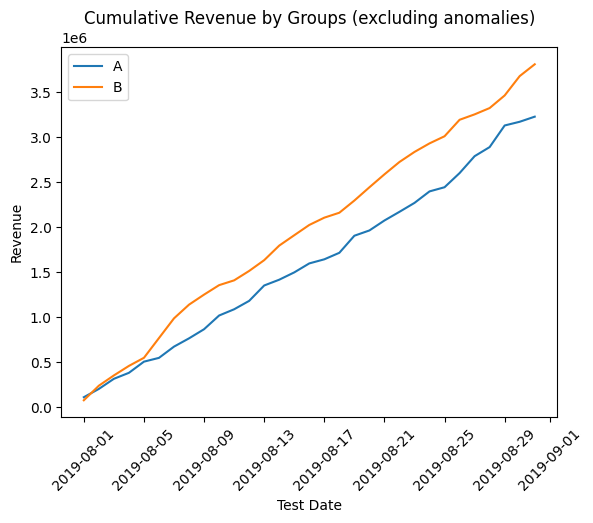

In [29]:
# Creating an array of unique date-group pairs from the orders dataframe
datesGroups2 = orders2[['date','group']].drop_duplicates()

# Aggregating cumulative daily order data
ordersAggregated2 = datesGroups2.apply(
    lambda x: orders2[
        np.logical_and(
            orders2['date'] <= x['date'], orders2['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Aggregating cumulative daily visitor data
visitorsAggregated2 = datesGroups2.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# Merging cumulative data into one table and assign clear column names
cumulativeData2 = ordersAggregated2.merge(visitorsAggregated2, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData2.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# DataFrame with cumulative number of orders and revenue by day in group A
cumulativeRevenueA2 = cumulativeData2[cumulativeData2['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative number of orders and revenue by day in group B
cumulativeRevenueB2 = cumulativeData2[cumulativeData2['group']=='B'][['date','revenue', 'orders']]

# Plotting cumulative revenue for group A
plt.plot(cumulativeRevenueA2['date'], cumulativeRevenueA2['revenue'], label='A')

# Plotting cumulative revenue for group B
plt.plot(cumulativeRevenueB2['date'], cumulativeRevenueB2['revenue'], label='B')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding title to the plot
plt.title('Cumulative Revenue by Groups (excluding anomalies)')

# Adding labels to the axes
plt.xlabel('Test Date')
plt.ylabel('Revenue')

plt.legend();

**Graph of Cumulative Average Order Value by Groups**

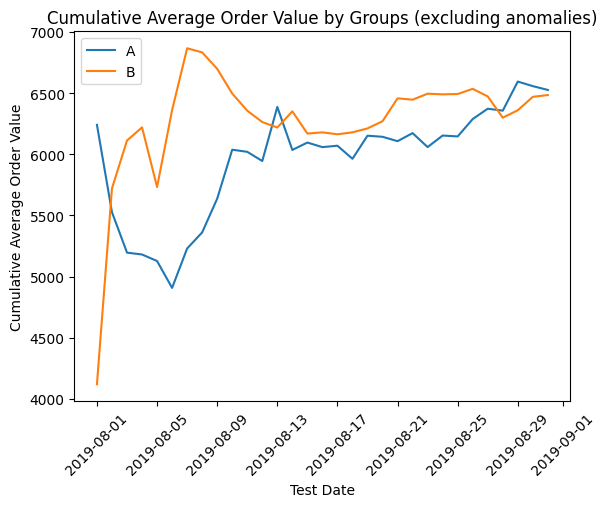

In [30]:
# Dividing cumulative revenue by cumulative number of orders
plt.plot(cumulativeRevenueA2['date'], cumulativeRevenueA2['revenue'] / cumulativeRevenueA2['orders'], label='A')
plt.plot(cumulativeRevenueB2['date'], cumulativeRevenueB2['revenue'] / cumulativeRevenueB2['orders'], label='B')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding title to the plot
plt.title('Cumulative Average Order Value by Groups (excluding anomalies)')

# Adding labels to the axes
plt.xlabel('Test Date')
plt.ylabel('Cumulative Average Order Value')

plt.legend();

**Graph of relative change in cumulative average check of Group B compared to Group A**

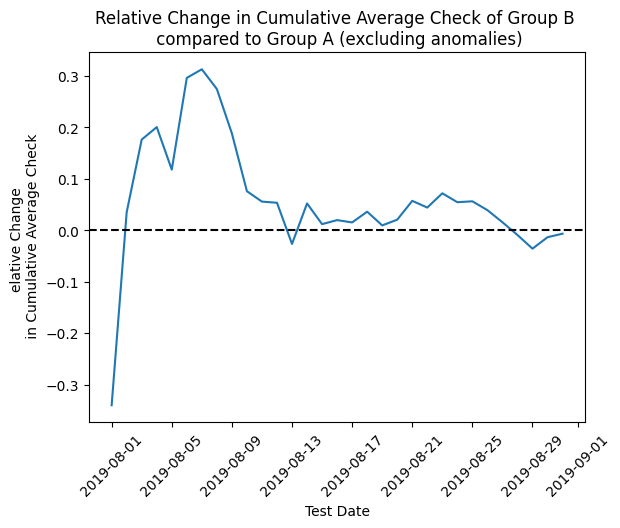

In [31]:
# Combining data into one dataframe
mergedCumulativeRevenue2 = cumulativeRevenueA2.merge(
                            cumulativeRevenueB2, 
                            left_on='date', 
                            right_on='date', 
                            how='left', 
                            suffixes=['A', 'B'])

# Plotting the ratio of average order values
plt.plot(mergedCumulativeRevenue2['date'], 
         (mergedCumulativeRevenue2['revenueB'] / mergedCumulativeRevenue2['ordersB']) /
         (mergedCumulativeRevenue2['revenueA'] / mergedCumulativeRevenue2['ordersA']) - 1)

# Adding the zero line
plt.axhline(y=0, color='black', linestyle='--')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding labels to axes
plt.xlabel('Test Date')
plt.ylabel('elative Change \n in Cumulative Average Check')

# Adding title to the plot
plt.title('Relative Change in Cumulative Average Check of Group B \n compared to Group A (excluding anomalies)');

**Graph of Cumulative Average Orders per Visitor by Groups**

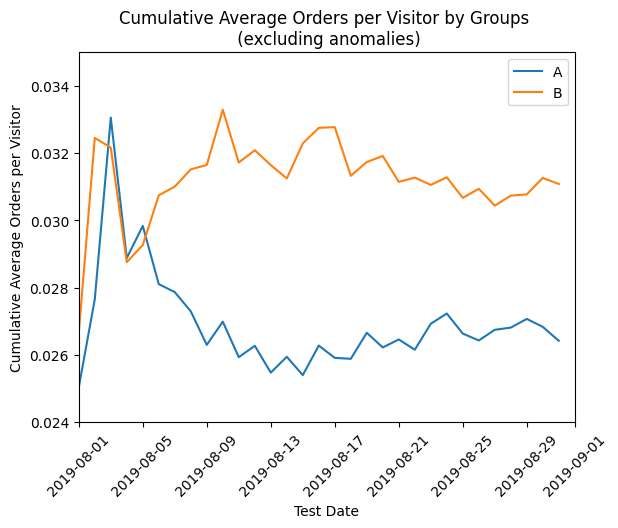

In [32]:
# Calculating average number of orders per visitor
cumulativeData2['conversion'] = cumulativeData2['orders'] / cumulativeData2['visitors']

# Separating data for group A
cumulativeDataA2 = cumulativeData2[cumulativeData2['group'] == 'A']

# Separating data for group B
cumulativeDataB2 = cumulativeData2[cumulativeData2['group'] == 'B']

# Plotting
plt.plot(cumulativeDataA2['date'], cumulativeDataA2['conversion'], label='A')
plt.plot(cumulativeDataB2['date'], cumulativeDataB2['conversion'], label='B')
plt.legend()

# Setting axes scale
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.024, 0.035])

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding labels to axes
plt.xlabel('Test Date')
plt.ylabel('Cumulative Average Orders per Visitor')

# Adding title to the plot
plt.title('Cumulative Average Orders per Visitor by Groups \n (excluding anomalies)');

**Graph of the Relative Change in Cumulative Average Orders per Visitor for Group B Compared to Group A**

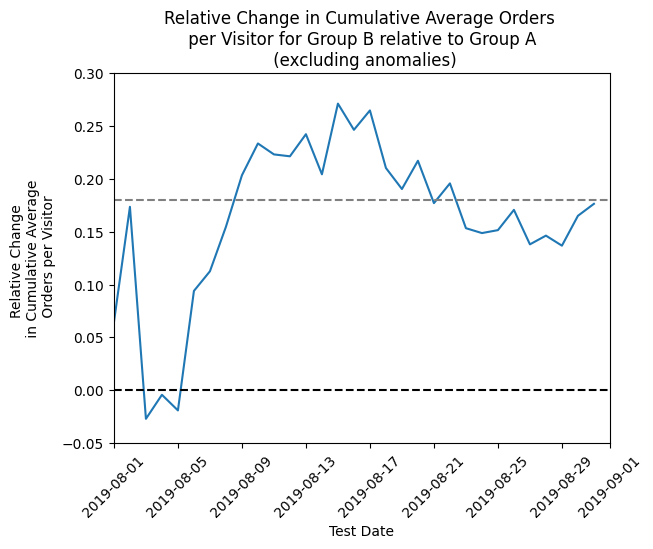

In [33]:
# Merging tables cumulativeDataA and cumulativeDataB
mergedCumulativeConversions2 = cumulativeDataA2[['date','conversion']].merge(
                              cumulativeDataB2[['date','conversion']], 
                              left_on='date', 
                              right_on='date', 
                              how='left', 
                              suffixes=['A', 'B'])

# Plotting
plt.plot(mergedCumulativeConversions2['date'], mergedCumulativeConversions2['conversionB']/
         mergedCumulativeConversions2['conversionA'] - 1)

# Adding horizontal lines
plt.axhline(y=0, color='black', linestyle='--')  # Horizontal line at y=0
plt.axhline(y=0.18, color='grey', linestyle='--')  # Horizontal line at y=0.18

# Setting axes scale
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.05, 0.3])

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding labels to axes
plt.xlabel('Test Date')
plt.ylabel('Relative Change \n in Cumulative Average \n Orders per Visitor')

# Adding title to the plot
plt.title('Relative Change in Cumulative Average Orders \n per Visitor for Group B relative to Group A \n (excluding anomalies)');

Without considering anomalous data, the results of the A/B test show the following: the average number of orders per user in group B increased by almost 20% compared to group A. However, by the end of the test, the cumulative average order value for group B fell below that of group A. (Additionally, cumulative average order value for group A shows a clear trend of stable growth, whereas this metric for group B has not yet stabilized.)

Due to a higher number of orders and a higher average order value early in the test, group B accumulated greater cumulative revenue by the end of observations compared to group A. However, the gap is not significant, and if the average order value of group B continues to decline relative to group A, future revenue metrics may converge and become indistinguishable.

## Analysis Results

In summary of the study, the original data frames are characterized by their completeness and absence of obvious duplicates.

When prioritizing hypotheses using ICE and RICE frameworks, similar results are obtained. However, RICE prioritization brings hypotheses with a high share of audience/user coverage to the top, which should be considered when choosing a prioritization method. Applying both prioritization methods, hypotheses 7 'Add a subscription form to all main pages to collect customer database for email newsletters' and 0 'Add two new traffic acquisition channels to attract 30% more users' emerge as the most promising.

After identifying and removing anomalous values in the original data frames containing A/B test results, applying the Mann-Whitney U test to the resulting samples reveals statistically significant differences between groups A and B in terms of average order count and no statistically significant difference in average order value.

Users in group B started placing nearly 20% more orders compared to group A; however, by the end of the test, their average order value dropped below that of group A.

In the event of continuing the test and maintaining the difference in order counts between the groups:

- If the average order value remains stable or increases, group B will clearly be the winner.
- f the average order value in group B decreases relative to group A, the results between groups may converge, or group A may come out on top.